In [5]:
from gpaw import GPAW, FermiDirac
from gpaw.wavefunctions.pw import PW
from ase.io import read,write
from TDDFT import TDDFT
import numpy as np
from tqdm import tqdm
from ase.units import Hartree, Bohr
import matplotlib.pyplot as plt
from gpaw.external import ConstantElectricField
%matplotlib inline

c = 20
PW_cut=600
atoms = read('hBN.cif')
print(atoms.cell[2,2])
atoms.cell[2,2]=c
atoms.center()
write('hBN.cif',atoms,format='cif')

calc = GPAW(mode=PW(PW_cut),xc='PBE',
            kpts={'size': (4, 4, 1)},
            setups='sg15',
            occupations=FermiDirac(0.0001))

atoms.set_calculator(calc)
atoms.get_potential_energy()
calc.write('gs_sg15.gpw')

20.0

  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.1
 |___|_|             

User:   drg@forsite
Date:   Thu Apr  4 17:21:59 2019
Arch:   x86_64
Pid:    18485
Python: 3.6.7
gpaw:   /usr/local/lib/python3.6/dist-packages/gpaw
_gpaw:  /usr/local/lib/python3.6/dist-packages/
        _gpaw.cpython-36m-x86_64-linux-gnu.so
ase:    /home/drg/.local/lib/python3.6/site-packages/ase (version 3.17.0)
numpy:  /home/drg/.local/lib/python3.6/site-packages/numpy (version 1.16.2)
scipy:  /home/drg/.local/lib/python3.6/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: {size: (4, 4, 1)}
  mode: {ecut: 600.0,
         gammacentered: False,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.0001}
  setups: sg15
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Norm-conserving UPF setup:
  Element:    B
  Z:          5
  Valence:

In [6]:
from DensityMatrix import DensityMatrix

In [7]:
DM=DensityMatrix(calc)

In [8]:
dt=0.1;steps=100000
E=lambda t:1e-4*np.exp(-t/dt)
DM.propagate([0,1,2,3],[4,5,6,7],E,steps,dt,100,direction=[1,0,0])

100%|██████████| 100000/100000 [00:10<00:00, 9235.81it/s]


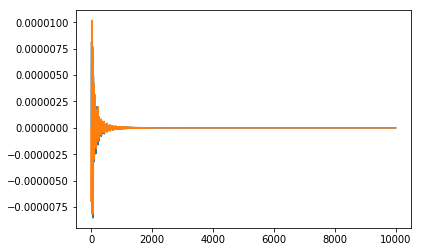

In [16]:
plt.plot(DM.time,DM.P.real)
plt.plot(DM.time,DM.P.imag)

In [20]:
P=np.fft.fft(DM.P)
freq = np.fft.fftfreq(steps, d=dt)*2*np.pi*Hartree
P=P[np.argsort(freq)]
freq=np.sort(freq)

# spectrum=np.abs(spectrum*freq)**2

(0, 6)

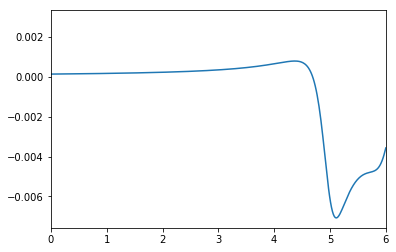

In [25]:
plt.plot(freq,P.imag)
plt.xlim([0,6])

In [24]:
2*np.trapz(freq*P.imag,freq)/np.pi

-0.36725326343342146